In [1]:
%cd ..

/Users/brewer/Code/UU/CS6390/litbank-entities


# explore

In [2]:
import os

import numpy as np
from matplotlib import pyplot as plt

from litbank_entities import litbank

In [3]:
if not os.path.exists(litbank.SRC_PATH_DEFAULT):
    ! git clone https://github.com/dbamman/litbank.git ./litbank/
else:
    print('litbank repository found in `./litbank/`.')

litbank repository found in `./litbank/`.


In [4]:
ann_paths = litbank.get_ann_paths()
txt_paths = litbank.get_txt_paths()
assert len(ann_paths) == len(txt_paths)

tsv_paths = litbank.get_tsv_paths()
assert len(tsv_paths) == len(ann_paths)

for i, ann_path in enumerate(ann_paths):
    basename = os.path.basename(ann_path)
    name = basename[:basename.index('.')]
    assert os.path.basename(txt_paths[i]).startswith(name)
    assert os.path.basename(tsv_paths[i]).startswith(name)

print('Found {:d} aligned texts.'.format(len(ann_paths)))

Found 100 aligned texts.


## Annotations

In [5]:
text_category_token_counts = list()
text_annotations = litbank.get_text_annotations()
texts = litbank.get_texts()
for i, annotations in enumerate(text_annotations):
    text = texts[i]
    category_token_counts = [0 for _ in range(len(litbank.ENTITY_CATEGORIES))]
    for id_, category, a, b, phrase in annotations:
        assert category in litbank.ENTITY_CATEGORY_SET
        assert text[a:b] == phrase
        category_token_counts[litbank.ENTITY_CATEGORY_TO_INDEX[category]] += len(phrase.split(' '))
    text_category_token_counts.append(category_token_counts)

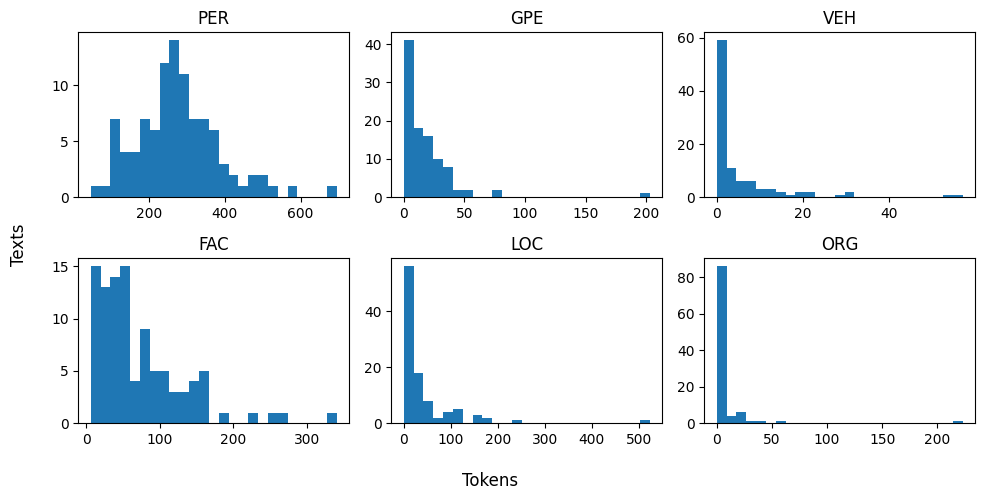

In [6]:
category_text_token_counts = list(zip(*text_category_token_counts))
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
for i, text_token_counts in enumerate(category_text_token_counts):
    ax = axes[i%2][i//2]
    ax.hist(text_token_counts, bins=25)
    ax.set_title(litbank.ENTITY_CATEGORIES[i])
fig.supylabel('Texts')
fig.supxlabel('Tokens')
fig.tight_layout()
plt.show()

In [7]:
total_category_token_counts = list(map(sum, category_text_token_counts))
for i, token_count in enumerate(total_category_token_counts):
    print('{:<{w}} {:>5d}'.format(litbank.ENTITY_CATEGORIES[i], token_count, w=max(map(len, litbank.ENTITY_CATEGORIES))))

PER 27689
FAC  7309
GPE  1817
LOC  4127
VEH   528
ORG   623


## tsv

(array([4, 5]), array([88, 12]))


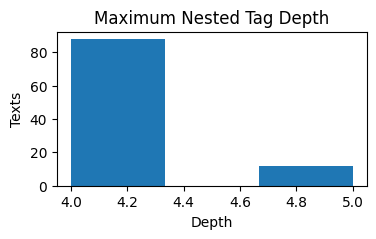

In [8]:
text_sentence_tokens, text_sentence_labels = litbank.get_text_sentence_tokens_labels()

text_n = np.array([len(sentence_labels[0][0]) for sentence_labels in text_sentence_labels])
print(np.unique(text_n, return_counts=True))
plt.figure(figsize=(4, 2))
plt.hist(text_n, bins=3)
plt.title('Maximum Nested Tag Depth')
plt.ylabel('Texts')
plt.xlabel('Depth')
plt.show()

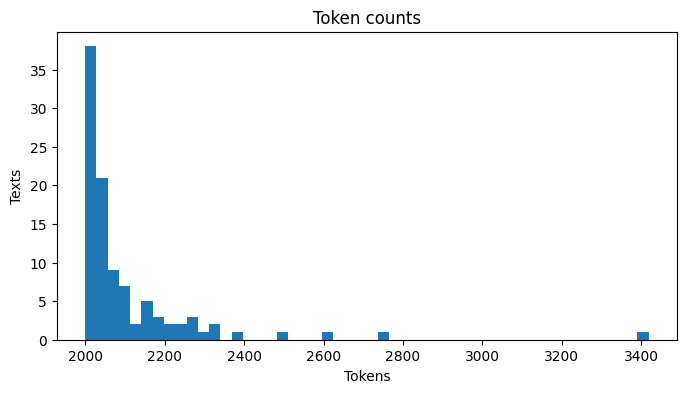

In [9]:
text_tokens = [sum(len(tokens) for tokens in sentence_tokens) for sentence_tokens in text_sentence_tokens]
plt.figure(figsize=(8, 4))
plt.hist(text_tokens, bins=50)
plt.title('Token counts')
plt.ylabel('Texts')
plt.xlabel('Tokens')
plt.show()